<a href="https://colab.research.google.com/github/bugsotim/dataviz2025/blob/main/Final_Group5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## tomato score

In [ ]:
tomato_score = pd.read_excel('/content/drive/MyDrive/Python&DataViz2025/Final DataViz2025/Netflix-movies.xlsx', sheet_name='Rotten Tomatoes Score')

In [ ]:
tomato_score.head()

,Movie Title,TOMATOMETER,# of Tomatometer Reviews,AUDIENCE SCORE,# of Audience Reviews
0,Percy Jackson & the Olympians: The Lightning T...,49.0,149.0,53.0,254421.0
1,Please Give,87.0,142.0,64.0,11574.0
2,10,67.0,24.0,53.0,14684.0
3,12 Angry Men (Twelve Angry Men),100.0,54.0,97.0,105386.0
4,"20,000 Leagues Under The Sea",89.0,27.0,74.0,68918.0


In [ ]:
tomato_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie Title               17712 non-null  object 
 1   TOMATOMETER               17668 non-null  float64
 2   # of Tomatometer Reviews  17668 non-null  float64
 3   AUDIENCE SCORE            17416 non-null  float64
 4   # of Audience Reviews     17415 non-null  float64
dtypes: float64(4), object(1)
memory usage: 692.0+ KB


In [ ]:
# missing value
tomato_score.isnull().sum()

,0
Movie Title,0
TOMATOMETER,44
# of Tomatometer Reviews,44
AUDIENCE SCORE,296
# of Audience Reviews,297


In [ ]:
tomato_score_cleaned = tomato_score.dropna()
display(tomato_score_cleaned.head())
display(tomato_score_cleaned.isnull().sum())

,Movie Title,TOMATOMETER,# of Tomatometer Reviews,AUDIENCE SCORE,# of Audience Reviews
0,Percy Jackson & the Olympians: The Lightning T...,49.0,149.0,53.0,254421.0
1,Please Give,87.0,142.0,64.0,11574.0
2,10,67.0,24.0,53.0,14684.0
3,12 Angry Men (Twelve Angry Men),100.0,54.0,97.0,105386.0
4,"20,000 Leagues Under The Sea",89.0,27.0,74.0,68918.0


,0
Movie Title,0
TOMATOMETER,0
# of Tomatometer Reviews,0
AUDIENCE SCORE,0
# of Audience Reviews,0


In [ ]:
tomato_score_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17406 entries, 0 to 17711
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie Title               17406 non-null  object 
 1   TOMATOMETER               17406 non-null  float64
 2   # of Tomatometer Reviews  17406 non-null  float64
 3   AUDIENCE SCORE            17406 non-null  float64
 4   # of Audience Reviews     17406 non-null  float64
dtypes: float64(4), object(1)
memory usage: 815.9+ KB


In [ ]:
tomato_score_cleaned.columns = tomato_score_cleaned.columns.str.lower().str.replace(' ', '_').str.replace('#', 'count')
display(tomato_score_cleaned.head())

,movie_title,tomatometer,count_of_tomatometer_reviews,audience_score,count_of_audience_reviews
0,Percy Jackson & the Olympians: The Lightning T...,49.0,149.0,53.0,254421.0
1,Please Give,87.0,142.0,64.0,11574.0
2,10,67.0,24.0,53.0,14684.0
3,12 Angry Men (Twelve Angry Men),100.0,54.0,97.0,105386.0
4,"20,000 Leagues Under The Sea",89.0,27.0,74.0,68918.0


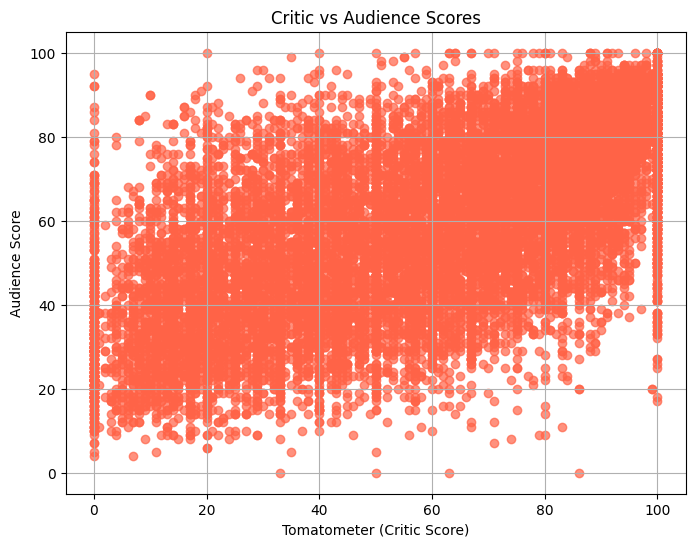

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(tomato_score_cleaned['tomatometer'], tomato_score_cleaned['audience_score'], alpha=0.7,color='tomato')

plt.title('Critic vs Audience Scores')
plt.xlabel('Tomatometer (Critic Score)')
plt.ylabel('Audience Score')
plt.grid(True)
plt.show()


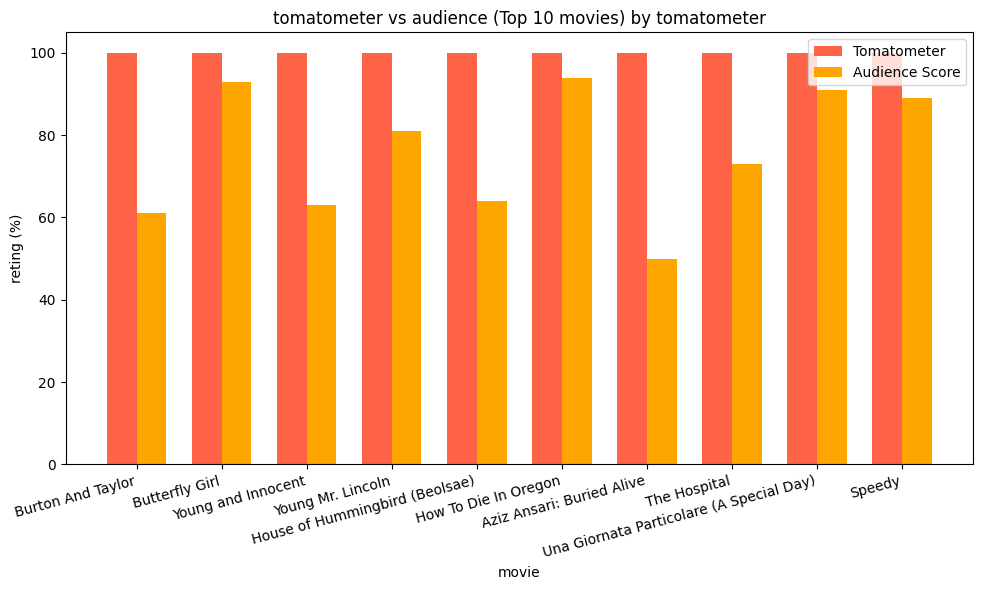

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Top 10 movie score by Tomatometer
top10 = tomato_score_cleaned.sort_values('tomatometer', ascending=False).head(10)

x = np.arange(len(top10))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))

bars1 = ax.bar(x - width/2, top10['tomatometer'], width, label='Tomatometer', color='tomato')
bars2 = ax.bar(x + width/2, top10['audience_score'], width, label='Audience Score', color='orange')

ax.set_ylabel('reting (%)')
ax.set_xlabel('movie')
ax.set_title('tomatometer vs audience (Top 10 movies) by tomatometer')
ax.set_xticks(x)
ax.set_xticklabels(top10['movie_title'], rotation=15, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


## Netflix flim

In [ ]:
netflix_flim = pd.read_excel('/content/drive/MyDrive/Python&DataViz2025/Final DataViz2025/Netflix-movies.xlsx', sheet_name='Netflix Films')

In [ ]:
netflix_flim.head()

,Movie Title,Director,Country,Release Year,Rating,Length,Genre
0,Dick Johnson Is Dead,Kirsten Johnson,United States,2020,PG-13,90 min,Documentaries
1,My Little Pony: A New Generation,Robert Cullen,Not listed,2021,PG,91 min,Children & Family Movies
2,Sankofa,Haile Gerima,"United States, Ghana, Burkina Faso, United Kin...",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
3,The Starling,Theodore Melfi,United States,2021,PG-13,104 min,"Comedies, Dramas"
4,Je Suis Karl,Christian Schwochow,"Germany, Czech Republic",2021,TV-MA,127 min,"Dramas, International Movies"


In [ ]:
netflix_flim.info()

netflix_flim.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6131 entries, 0 to 6130
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie Title   6131 non-null   object
 1   Director      5943 non-null   object
 2   Country       6131 non-null   object
 3   Release Year  6131 non-null   int64 
 4   Rating        6129 non-null   object
 5   Length        6128 non-null   object
 6   Genre         6131 non-null   object
dtypes: int64(1), object(6)
memory usage: 335.4+ KB


,0
Movie Title,0
Director,188
Country,0
Release Year,0
Rating,2
Length,3
Genre,0


In [ ]:
netflix_flim['Director'].fillna('Unknown', inplace=True)
netflix_flim.dropna(subset=['Rating', 'Length'], inplace=True)

/tmp/ipython-input-4220013132.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_flim['Director'].fillna('Unknown', inplace=True)


In [ ]:
netflix_flim['Length'] = netflix_flim['Length'].astype(str).str.replace(r'[^\d.]', '', regex=True)
netflix_flim['Length'] = pd.to_numeric(netflix_flim['Length'], errors='coerce')

In [ ]:
netflix_flim.info()

netflix_flim.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 6126 entries, 0 to 6130
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Movie Title   6126 non-null   object
 1   Director      6126 non-null   object
 2   Country       6126 non-null   object
 3   Release Year  6126 non-null   int64 
 4   Rating        6126 non-null   object
 5   Length        6126 non-null   int64 
 6   Genre         6126 non-null   object
dtypes: int64(2), object(5)
memory usage: 382.9+ KB


,0
Movie Title,0
Director,0
Country,0
Release Year,0
Rating,0
Length,0
Genre,0


In [ ]:
print("Unique values in Rating:")
print(netflix_flim['Rating'].unique())

Unique values in Rating:
['PG-13' 'PG' 'TV-MA' 'TV-PG' 'TV-14' 'TV-Y' 'R' 'TV-G' 'TV-Y7' 'G'
 'NC-17' 'NR' 'TV-Y7-FV' 'UR']


In [ ]:
# รวม 'UR' และ 'NR' ให้เป็น 'NOT RATED'
netflix_flim['Rating'] = netflix_flim['Rating'].replace(['NR', 'UR'], 'NOT RATED')

In [ ]:
# Extract the primary country (the first one listed)
netflix_flim['Primary Country'] = netflix_flim['Country'].apply(lambda x: x.split(',')[0].strip())

def get_other_countries(row):
    all_countries = [country.strip() for country in row['Country'].split(',')]
    primary_country = row['Primary Country']
    other_countries = [country for country in all_countries if country != primary_country]

    if other_countries:
        return ', '.join(other_countries)
    else:
        return 'Unknown'

netflix_flim['Other Country'] = netflix_flim.apply(get_other_countries, axis=1)

display(netflix_flim[['Movie Title', 'Country', 'Primary Country', 'Other Country']].head())

,Movie Title,Country,Primary Country,Other Country
0,Dick Johnson Is Dead,United States,United States,Unknown
1,My Little Pony: A New Generation,Not listed,Not listed,Unknown
2,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",United States,"Ghana, Burkina Faso, United Kingdom, Germany, ..."
3,The Starling,United States,United States,Unknown
4,Je Suis Karl,"Germany, Czech Republic",Germany,Czech Republic


In [ ]:
# Replace 'Unknown' values with 'Not Listed' in column
netflix_flim['Primary Country'] = netflix_flim['Primary Country'].replace('Unknown', 'Not Listed')
netflix_flim['Other Country'] = netflix_flim['Other Country'].replace('Unknown', 'Not Listed')

display(netflix_flim[['Movie Title', 'Country', 'Primary Country', 'Other Country']].head(10))

,Movie Title,Country,Primary Country,Other Country
0,Dick Johnson Is Dead,United States,United States,Not Listed
1,My Little Pony: A New Generation,Not listed,Not listed,Not Listed
2,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",United States,"Ghana, Burkina Faso, United Kingdom, Germany, ..."
3,The Starling,United States,United States,Not Listed
4,Je Suis Karl,"Germany, Czech Republic",Germany,Czech Republic
5,Confessions of an Invisible Girl,Not listed,Not listed,Not Listed
6,Europe's Most Dangerous Man: Otto Skorzeny in ...,Not listed,Not listed,Not Listed
7,Intrusion,Not listed,Not listed,Not Listed
8,Avvai Shanmughi,Not listed,Not listed,Not Listed
9,Go! Go! Cory Carson: Chrissy Takes the Wheel,Not listed,Not listed,Not Listed


In [ ]:
netflix_flim.columns = netflix_flim.columns.str.lower().str.replace(' ', '_')
netflix_flim = netflix_flim.drop('country', axis=1)

In [ ]:
netflix_flim.head()

,movie_title,director,release_year,rating,length,genre,primary_country,other_country
0,Dick Johnson Is Dead,Kirsten Johnson,2020,PG-13,90,Documentaries,United States,Not Listed
1,My Little Pony: A New Generation,Robert Cullen,2021,PG,91,Children & Family Movies,Not listed,Not Listed
2,Sankofa,Haile Gerima,1993,TV-MA,125,"Dramas, Independent Movies, International Movies",United States,"Ghana, Burkina Faso, United Kingdom, Germany, ..."
3,The Starling,Theodore Melfi,2021,PG-13,104,"Comedies, Dramas",United States,Not Listed
4,Je Suis Karl,Christian Schwochow,2021,TV-MA,127,"Dramas, International Movies",Germany,Czech Republic


In [ ]:
#create primary_genre and other_genre to split genre and drop column 'genre'
netflix_flim['genre'] = netflix_flim['genre'].str.strip().str.title()

netflix_flim['primary_genre'] = netflix_flim['genre'].str.split(',').str[0].str.strip()

netflix_flim['other_genre'] = np.where(
    netflix_flim['genre'].str.contains(','),
    netflix_flim['genre'].str.split(',', n=1).str[1].str.strip(),'Not Listed'
)

netflix_flim['primary_genre'] = netflix_flim['primary_genre'].str.title().astype('category')
netflix_flim['other_genre'] = netflix_flim['other_genre'].str.title()

netflix_flim = netflix_flim.drop('genre', axis=1)

In [ ]:
netflix_flim.head()

,movie_title,director,release_year,rating,length,primary_country,other_country,primary_genre,other_genre
0,Dick Johnson Is Dead,Kirsten Johnson,2020,PG-13,90,United States,Not Listed,Documentaries,Not Listed
1,My Little Pony: A New Generation,Robert Cullen,2021,PG,91,Not listed,Not Listed,Children & Family Movies,Not Listed
2,Sankofa,Haile Gerima,1993,TV-MA,125,United States,"Ghana, Burkina Faso, United Kingdom, Germany, ...",Dramas,"Independent Movies, International Movies"
3,The Starling,Theodore Melfi,2021,PG-13,104,United States,Not Listed,Comedies,Dramas
4,Je Suis Karl,Christian Schwochow,2021,TV-MA,127,Germany,Czech Republic,Dramas,International Movies


In [ ]:
netflix_flim.info()

netflix_flim.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 6126 entries, 0 to 6130
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   movie_title      6126 non-null   object  
 1   director         6126 non-null   object  
 2   release_year     6126 non-null   int64   
 3   rating           6126 non-null   object  
 4   length           6126 non-null   int64   
 5   primary_country  6126 non-null   object  
 6   other_country    6126 non-null   object  
 7   primary_genre    6126 non-null   category
 8   other_genre      6126 non-null   object  
dtypes: category(1), int64(2), object(6)
memory usage: 437.4+ KB


,0
movie_title,0
director,0
release_year,0
rating,0
length,0
primary_country,0
other_country,0
primary_genre,0
other_genre,0


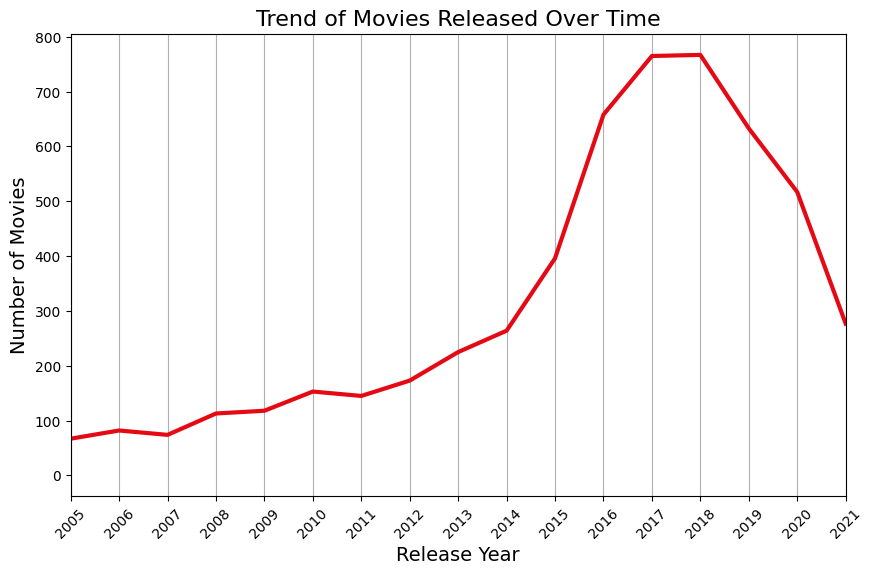

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trend of Movies Released Over Time
movies_per_year = netflix_flim['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, color='#e50914', linewidth=3)
plt.title('Trend of Movies Released Over Time', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(movies_per_year.index, rotation=45) # Set ticks to the actual years
plt.xlim(2005, 2021)
plt.grid(axis='x')
plt.show()

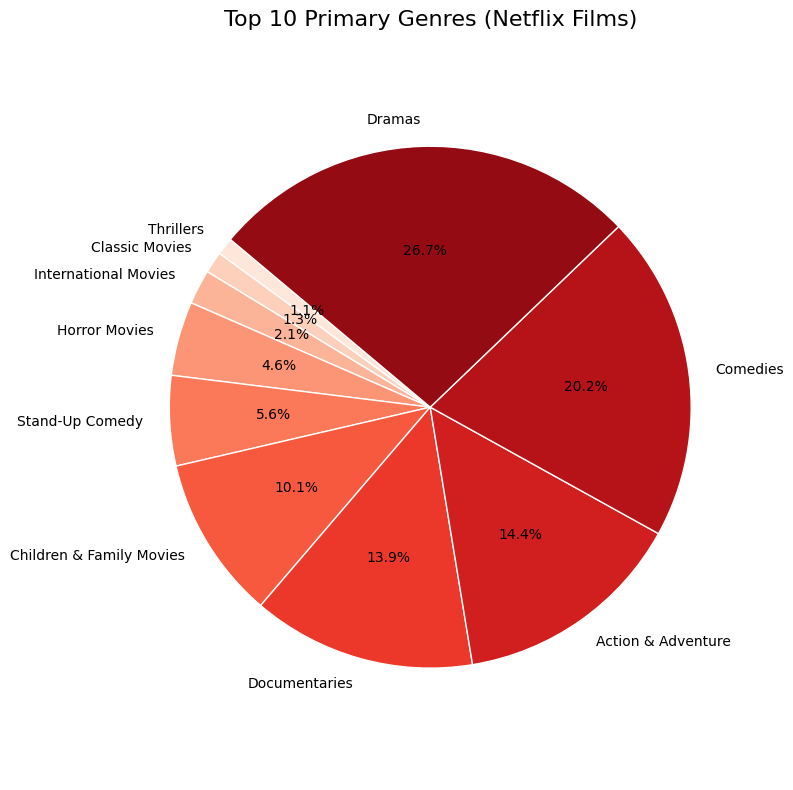

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# นับจำนวนของแต่ละ genre แล้วเลือก 10 อันดับแรก
primary_genre_counts = netflix_flim['primary_genre'].value_counts()
top_genres = primary_genre_counts.head(10)
top_genres_sorted = top_genres.sort_values(ascending=True)
plt.figure(figsize=(8, 8))
colors = sns.color_palette('Reds', len(top_genres_sorted))

plt.pie(
    top_genres_sorted.values,
    labels=top_genres_sorted.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Top 10 Primary Genres (Netflix Films)', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
!pip install squarify

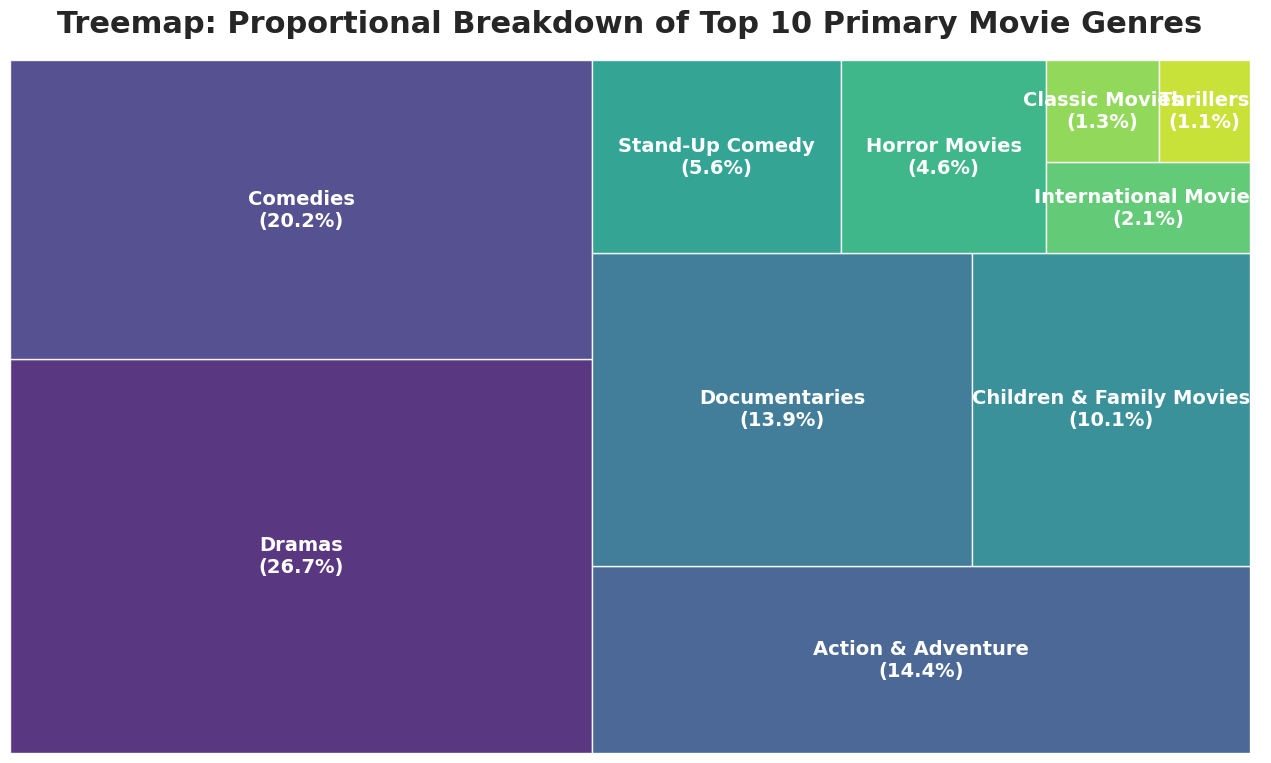

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['font.size'] = 10
sns.set_style("white")

netflix_flim['primary_genre'] = netflix_flim['primary_genre'].astype(str).str.strip() # ทำความสะอาดซ้ำเพื่อความแน่ใจ
genre_counts = netflix_flim[netflix_flim['primary_genre'] != 'Not Listed']['primary_genre'].value_counts()

top_10_genres = genre_counts.head(10)

sizes = top_10_genres.values
label_names = top_10_genres.index

total_count = top_10_genres.sum()
labels_with_size = [
    f"{name}\n({size/total_count:.1%})"
    for name, size in zip(label_names, sizes)
]

plt.figure(figsize=(16, 9))
squarify.plot(
    sizes=sizes,
    label=labels_with_size,
    color=sns.color_palette("viridis", len(sizes)),
    alpha=0.9,
    pad=False,
    text_kwargs={'color': 'white', 'fontsize': 14, 'fontweight': 'bold'}
)
plt.title(
    'Treemap: Proportional Breakdown of Top 10 Primary Movie Genres',
    fontsize=22,
    weight='bold',
    pad=20
)
plt.axis('off')
plt.show()

## IMDB

In [ ]:
imdb = pd.read_csv('/content/drive/MyDrive/Python&DataViz2025/Final DataViz2025/imdb_top_1000.csv')

In [ ]:
imdb.info()

imdb.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


In [ ]:
# Drop specified columns
columns_to_drop = ['Overview','Meta_score','Certificate']
imdb_dropped = imdb.drop(columns=columns_to_drop)
imdb_dropped.isnull().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Runtime,0
Genre,0
IMDB_Rating,0
Director,0
Star1,0
Star2,0
Star3,0


In [ ]:
if 'Gross' in imdb_dropped.columns:
    imdb_dropped['Gross'] = imdb_dropped['Gross'].fillna(0)

print("DataFrame after filling missing values in 'Gross' with 0:")
display(imdb_dropped.head())
print("\nMissing values after filling 'Gross':")
print(imdb_dropped.isnull().sum())


DataFrame after filling missing values in 'Gross' with 0:


,Poster_Link,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,142 min,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,175 min,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,96 min,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"



Missing values after filling 'Gross':
Poster_Link      0
Series_Title     0
Released_Year    0
Runtime          0
Genre            0
IMDB_Rating      0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [ ]:
imdb_dropped.columns = imdb_dropped.columns.str.lower().str.replace(' ', '_')
imdb_dropped = imdb_dropped.rename(columns={'series_title': 'movie_title'})
imdb_dropped = imdb_dropped.rename(columns={'runtime': 'length'})
display(imdb_dropped.head())

,poster_link,movie_title,released_year,length,genre,imdb_rating,director,star1,star2,star3,star4,no_of_votes,gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,142 min,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,175 min,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,96 min,"Crime, Drama",9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
import numpy as np
#create primary_genre and other_genre to split genre and drop column 'genre'
imdb_dropped['genre'] = imdb_dropped['genre'].str.strip().str.title()
imdb_dropped['primary_genre'] = imdb_dropped['genre'].str.split(',').str[0].str.strip()

imdb_dropped['other_genre'] = np.where(
    imdb_dropped['genre'].str.contains(','),
    imdb_dropped['genre'].str.split(',', n=1).str[1].str.strip(),'Not Listed'
)

imdb_dropped['primary_genre'] = imdb_dropped['primary_genre'].str.title().astype('category')
imdb_dropped['other_genre'] = imdb_dropped['other_genre'].str.title()

imdb_dropped = imdb_dropped.drop('genre', axis=1)

print("New DataFrame Structure:")
print(imdb_dropped.info())

New DataFrame Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   poster_link    1000 non-null   object  
 1   movie_title    1000 non-null   object  
 2   released_year  1000 non-null   object  
 3   length         1000 non-null   object  
 4   imdb_rating    1000 non-null   float64 
 5   director       1000 non-null   object  
 6   star1          1000 non-null   object  
 7   star2          1000 non-null   object  
 8   star3          1000 non-null   object  
 9   star4          1000 non-null   object  
 10  no_of_votes    1000 non-null   int64   
 11  gross          1000 non-null   object  
 12  primary_genre  1000 non-null   category
 13  other_genre    1000 non-null   object  
dtypes: category(1), float64(1), int64(1), object(11)
memory usage: 103.3+ KB
None


In [ ]:
# drop min in length column
imdb_dropped['length'] = imdb_dropped['length'].astype(str).str.replace(' min', '', regex=False)
imdb_dropped['length'] = pd.to_numeric(imdb_dropped['length'], errors='coerce')

In [ ]:
imdb_dropped.head()

,poster_link,movie_title,released_year,length,imdb_rating,director,star1,star2,star3,star4,no_of_votes,gross,primary_genre,other_genre
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,142,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",Drama,Not Listed
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,175,9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",Crime,Drama
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,152,9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",Action,"Crime, Drama"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,202,9.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",Crime,Drama
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,96,9.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",Crime,Drama


In [ ]:
import plotly.express as px
# create tree map about primary genre
genre_counts = imdb_dropped['primary_genre'].value_counts().reset_index()
genre_counts.columns = ['primary_genre', 'count']

fig = px.treemap(
    genre_counts,
    path=['primary_genre'],
    values='count',
    color='count',
    color_continuous_scale='Reds',
    title='Distribution of Primary Genres in IMDB Top 1000 Movies'
)

fig.update_traces(textinfo="label+value")
fig.update_layout(coloraxis_colorbar=dict(title='จำนวนภาพยนตร์'))
fig.show()

/usr/local/lib/python3.12/dist-packages/plotly/express/_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfg = df.groupby(path[i:]).agg(agg_f)


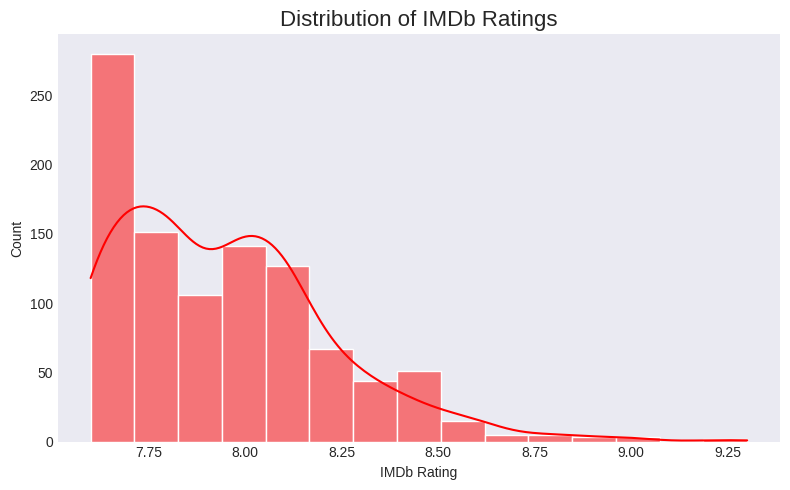

In [ ]:
# ==================== 🎬 NETFLIX STYLE VISUALS (NO GRID LINES) ==================== #
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = imdb_dropped.copy()

if 'imdb_rating' in df.columns:
    df = df.rename(columns={'imdb_rating': 'IMDB_Rating'})
elif 'IMDB_Rating' not in df.columns:
    print("Error: คอลัมน์ 'imdb_rating' หรือ 'IMDB_Rating' ไม่พบใน DataFrame.")

plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams.update({
    "grid.linestyle": 'None'
})

plt.figure(figsize=(8,5))
sns.histplot(df['IMDB_Rating'], bins=15, kde=True, color='red')

plt.title("Distribution of IMDb Ratings", fontsize=16)
plt.xlabel("IMDb Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## export

In [ ]:
output_file_path = '/content/drive/MyDrive/Python&DataViz2025/Final DataViz2025/cleaned_data.xlsx'

with pd.ExcelWriter(output_file_path) as writer:
    netflix_flim.to_excel(writer, sheet_name='Netflix Films Cleaned', index=False)
    tomato_score_cleaned.to_excel(writer, sheet_name='Rotten Tomatoes Cleaned', index=False)
    imdb_dropped.to_excel(writer, sheet_name='IMDB Cleaned', index=False)

print(f"DataFrames exported to {output_file_path}")

DataFrames exported to /content/drive/MyDrive/Python&DataViz2025/Final DataViz2025/cleaned_data.xlsx


## Dashboard

Link : https://lookerstudio.google.com/reporting/ee022c1b-45ab-4ca5-b459-e376817c333f